# Machine Learning
### Laboratory 9

# Machine Learning
### Laboratory 9

### **Drug Dataset**

### **Business Understanding**

- Scenario
    - A medical division collected some data from its patients
    - All the target patients contracted the same disease
    - The therapy consists of 5 different and exclusive cures
        - Each cure depends on the patients’ conditions
- Goal
    - Define an automatic procedure for the cure assignment 

### **Data Understanding**

| Column Name                   	| Description                                                                                                     	| Type                      	|
|-------------------	|------------------------------------------------	|-----------------      	|
| ID               	| Patient’s ID                    	|  Numeric                      	|
| Age               	| Patient’s age                 	|  Numeric             	|    
| Sex                	| Patient’s gender: F or M      	|  Binary                      	|
|      BP        	|        Blood Pressure: HIGH, NORMAL or LOW       	|   Categorical                       	|
|       Cholesterol         	|   Concentration of cholesterol in the blood: NORMAL or HIGH          	|   Binary    	|
|     Na           	|    Concentration of sodium in the blood       |     Numeric                    | 
|     K          	|   Concentration of potassium in the blood        	|   Numeric                       	|
|     Drug          	|      The chosen cure: drugY, drugC, drugX, drugA, drugB            	|      Categorical                    	|

### Import modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
plt.style.use('ggplot')

### Read data

In [ ]:
df = pd.read_csv('drug.csv',na_values = "?")

### Data Understanding

###### Data dimension (n_rows x n_columns)

In [ ]:
df.shape

(200, 8)

##### How many elements?

In [ ]:
df.size

1600

#### Attributes

In [ ]:
print(df.columns.tolist())

['ID', 'Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug']


#### Top 10 records

In [ ]:
df.head(10)

,ID,Age,Sex,BP,Cholesterol,Na,K,Drug
0,1,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,2,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,3,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,4,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,5,61,F,LOW,HIGH,0.559294,0.030998,drugY
5,6,22,F,NORMAL,HIGH,NaN,0.078647,drugX
6,7,49,F,NORMAL,HIGH,0.789637,0.048518,drugY
7,8,41,M,LOW,HIGH,0.766635,0.069461,drugC
8,9,60,M,NORMAL,HIGH,0.777205,0.051230,drugY
9,10,43,M,LOW,NORMAL,0.526102,0.027164,drugY


#### Get attribute type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           200 non-null    int64  
 1   Age          200 non-null    int64  
 2   Sex          200 non-null    object 
 3   BP           200 non-null    object 
 4   Cholesterol  200 non-null    object 
 5   Na           194 non-null    float64
 6   K            196 non-null    float64
 7   Drug         200 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 12.6+ KB


#### Convert wrong attribute types

- Sex
- BP
- Cholesterol
- Drug

In [ ]:
for attribute in df.columns:
    if df[attribute].dtype == object:
        df[attribute] = df[attribute].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           200 non-null    int64   
 1   Age          200 non-null    int64   
 2   Sex          200 non-null    category
 3   BP           200 non-null    category
 4   Cholesterol  200 non-null    category
 5   Na           194 non-null    float64 
 6   K            196 non-null    float64 
 7   Drug         200 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 7.7 KB


#### Are there any null values?

In [ ]:
df.isna().sum()

ID             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na             6
K              4
Drug           0
dtype: int64

#### Remove missing values

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

ID             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

#### Get general statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,190.0,101.305263,57.269912,1.000000,52.250000,102.500000,150.750000,200.000000
Age,190.0,44.810526,16.598779,15.000000,32.000000,45.000000,58.750000,74.000000
Na,190.0,0.696236,0.120109,0.500169,0.581946,0.724398,0.803268,0.896056
K,190.0,0.049753,0.017682,0.020022,0.034528,0.048467,0.065877,0.079788


In [ ]:
df.describe(include='category').T

,count,unique,top,freq
Sex,190,2,M,99
BP,190,3,HIGH,74
Cholesterol,190,2,HIGH,100
Drug,190,5,drugY,88


#### Building histograms

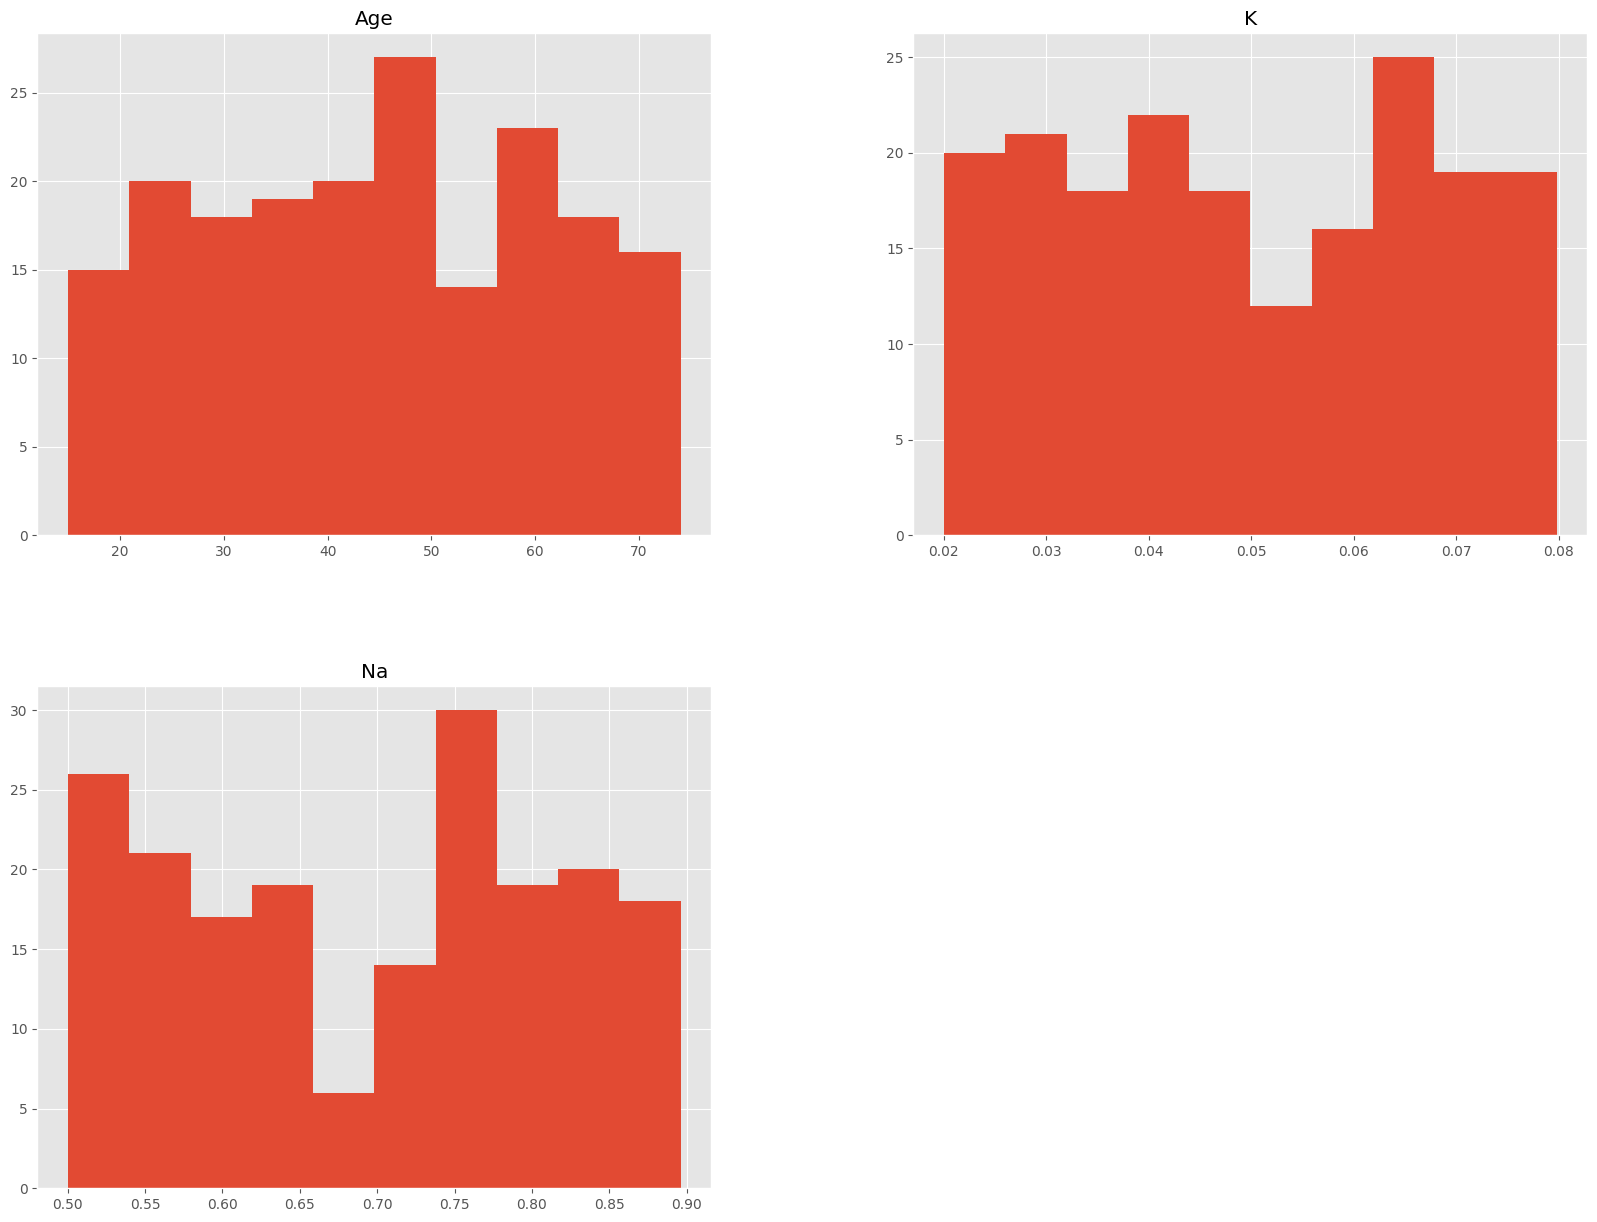

In [ ]:
numeric_df = df[df.columns.difference(['Sex','BP','Cholesterol','ID','Drug'])]
numeric_df.hist(figsize = (20,15))
plt.show()

#### Bar plots for categorical attributes

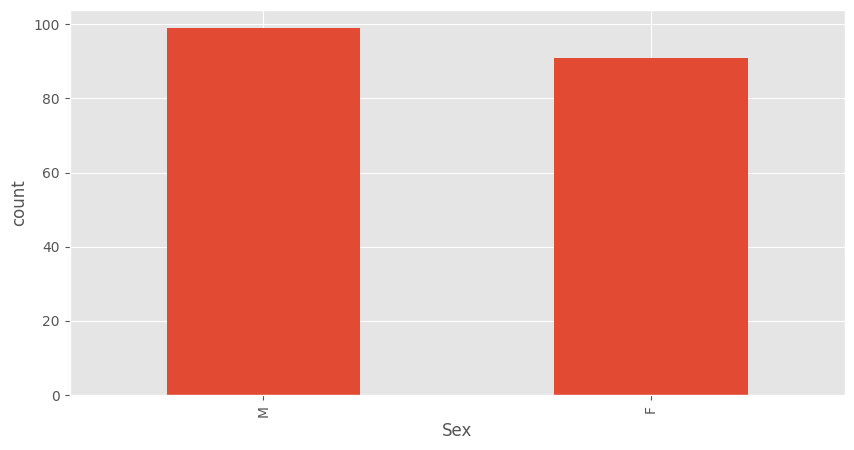

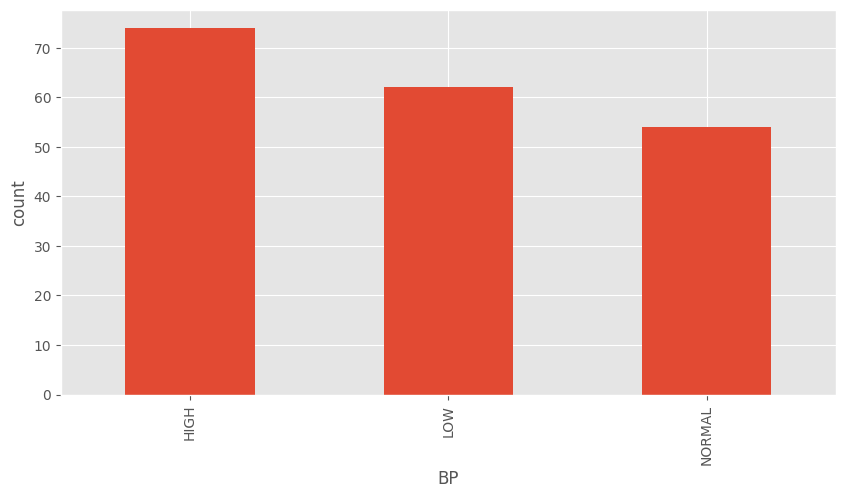

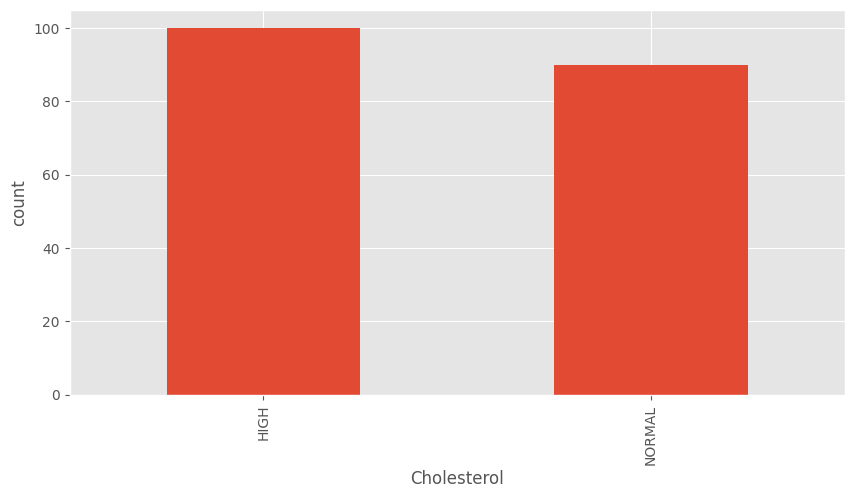

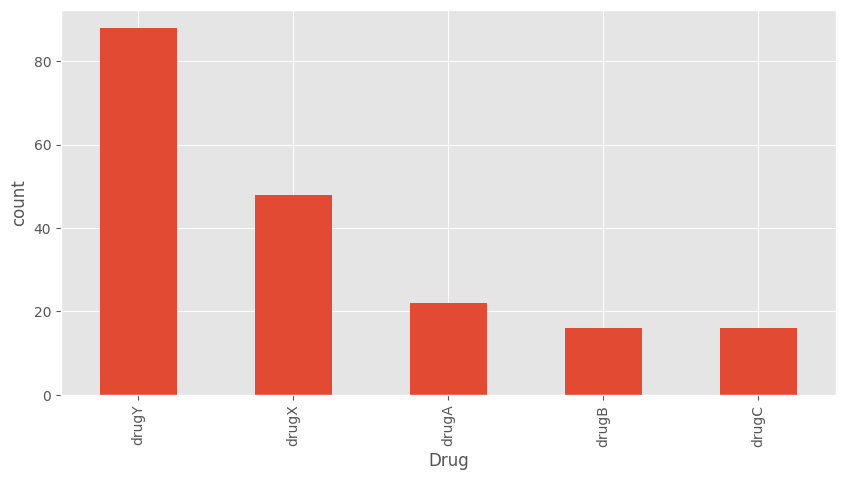

In [ ]:
category_columns = [col for col in df.columns if df[col].dtype.name == 'category']
for attribute in category_columns:
    val = df[attribute].value_counts()
    val.plot(kind='bar',figsize=(10,5))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()

#### **Histograms and bar plots according to the class attributes**

In [ ]:
import seaborn as sb

In [ ]:
numericDF = df[df.columns.difference(['Sex','BP','Cholesterol','ID'])]
numericAttributes = numericDF.columns.difference(['Drug'])
print(numericAttributes)

Index(['Age', 'K', 'Na'], dtype='object')


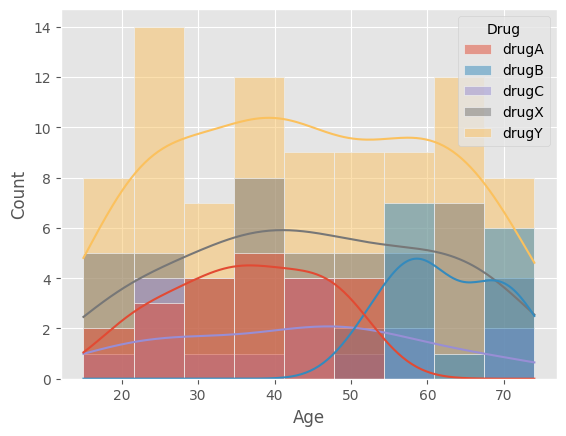

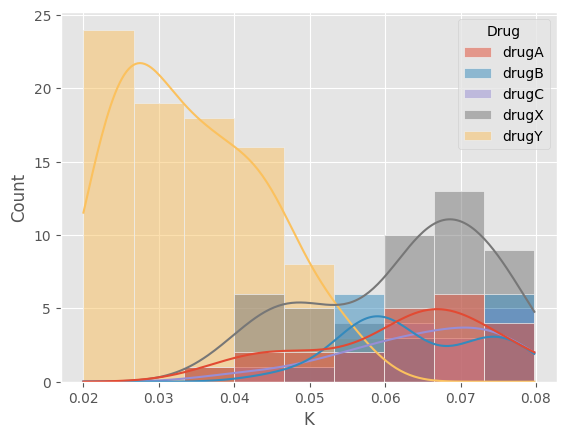

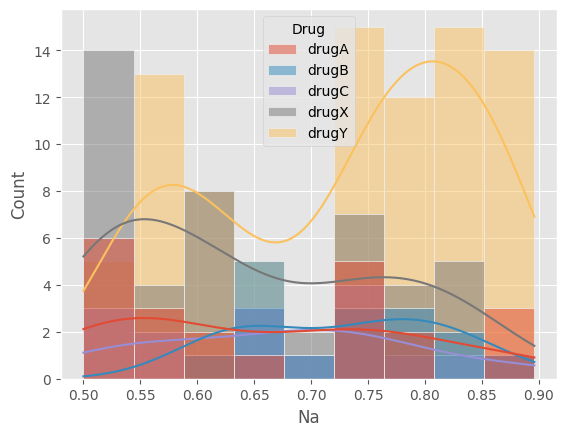

In [ ]:
for attribute in numericAttributes:
    sb.histplot(x = df[attribute], hue = 'Drug', data = numericDF, kde=True)
    plt.show()

In [ ]:
categoricalDF = df[df.columns.difference(numericAttributes)]
categoricalAttributes = df.columns.difference(['ID', 'Drug', 'K', 'Na', 'Age'])


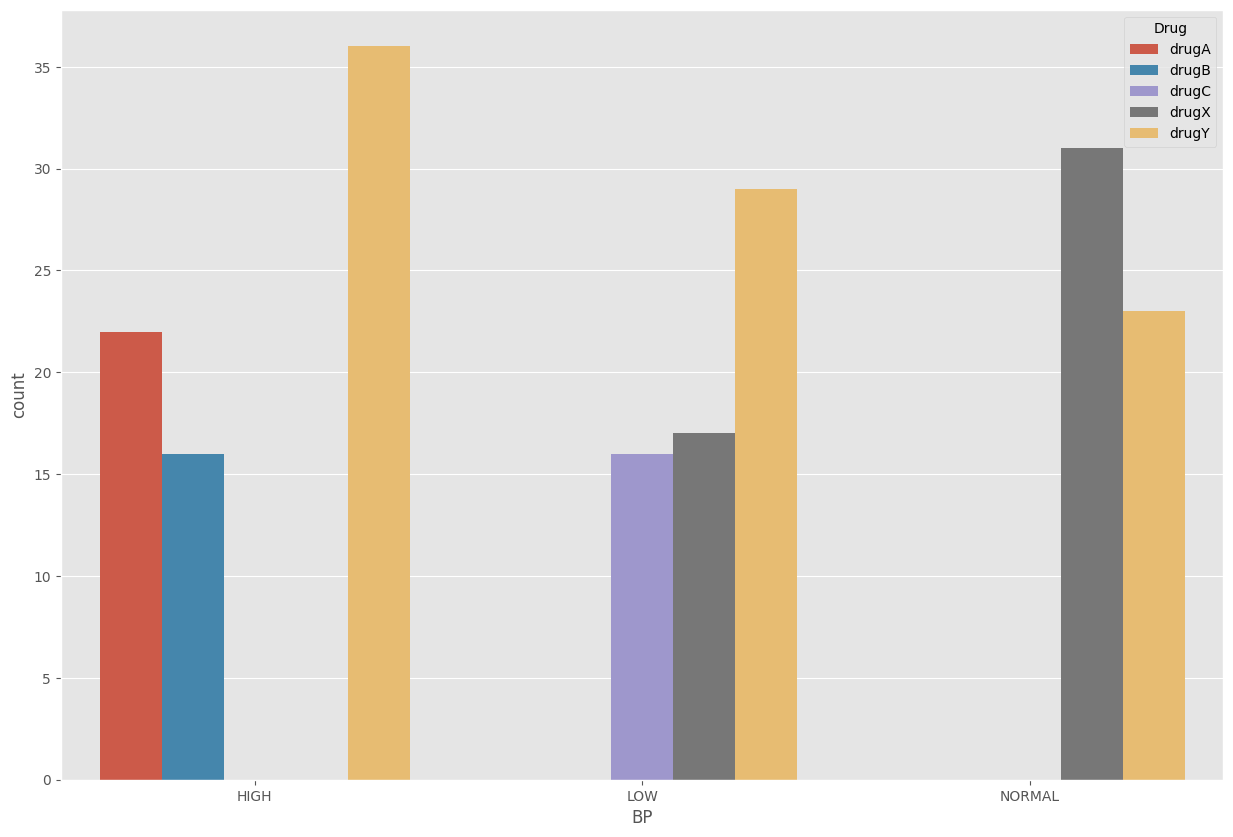

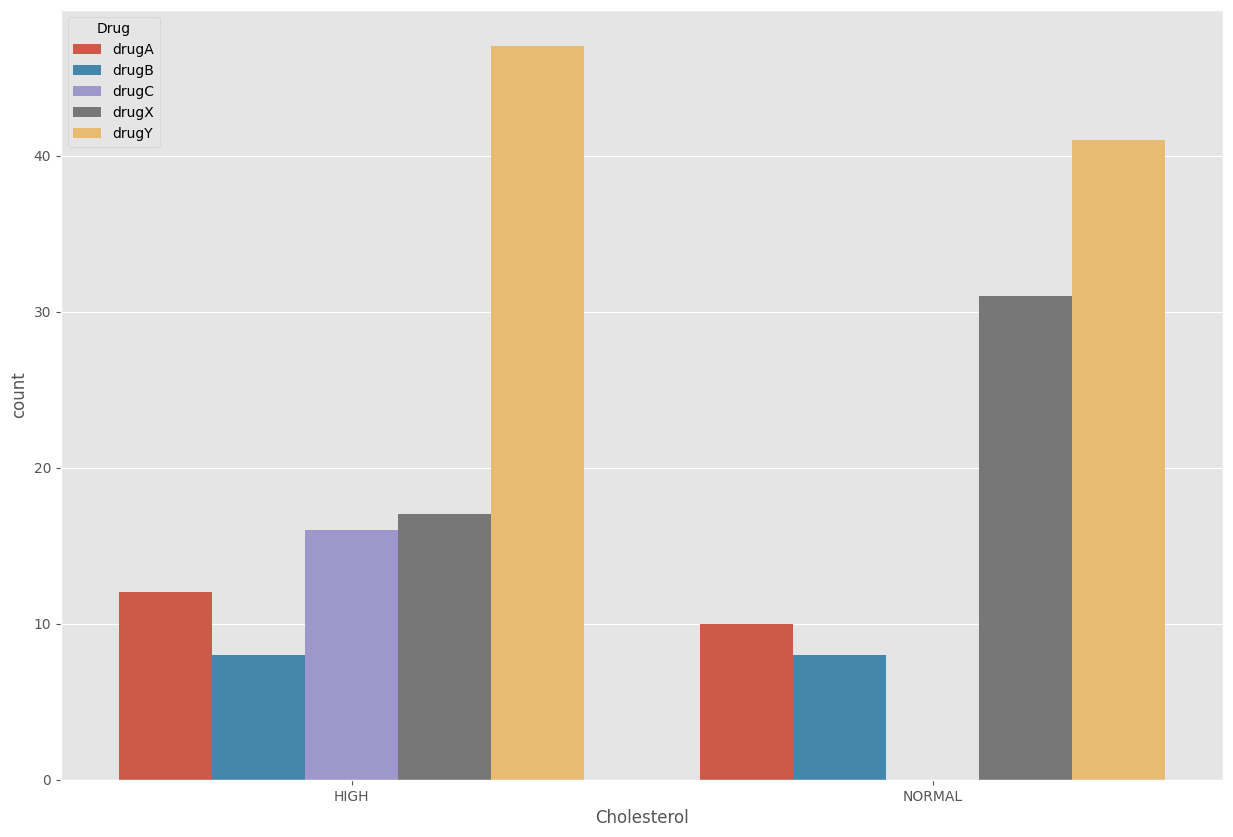

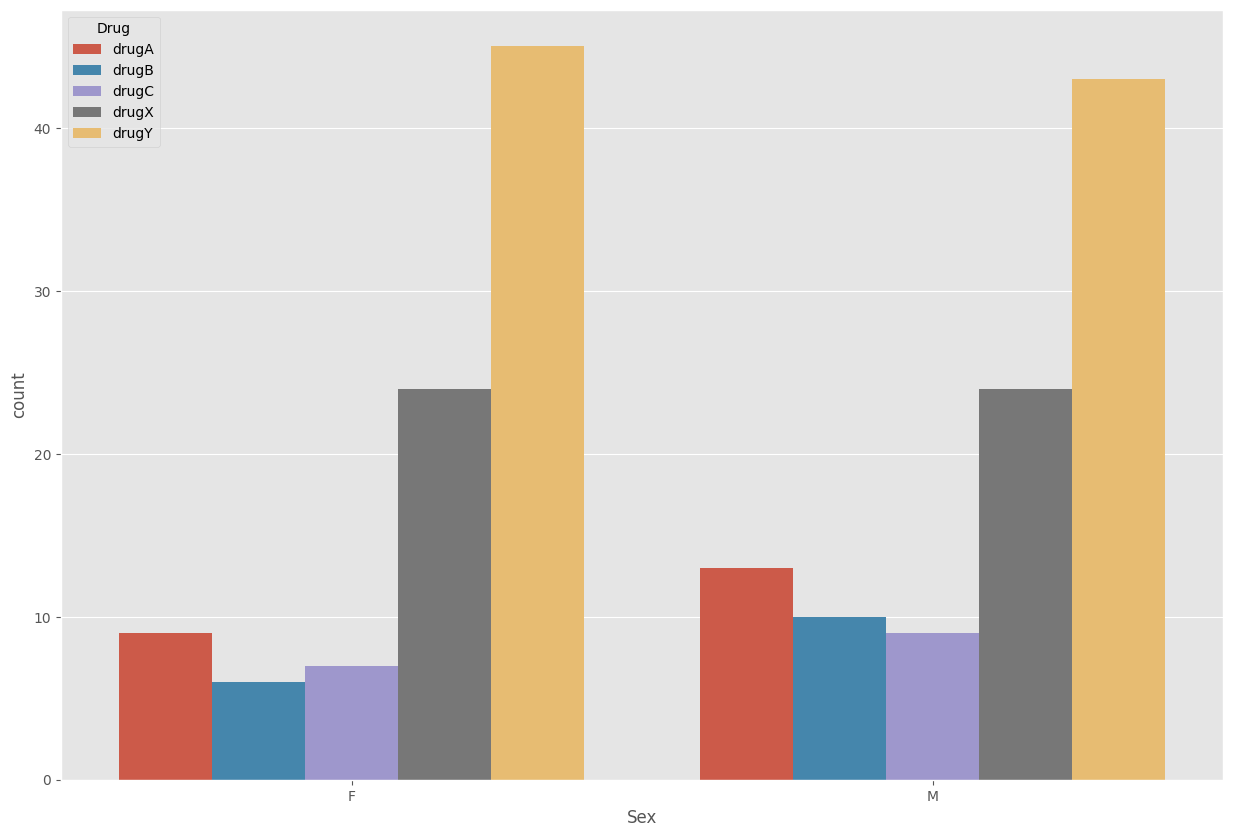

In [ ]:
for attribute in categoricalAttributes:
    plt.figure(figsize = (15, 10))
    sb.countplot(x = df[attribute], hue = 'Drug', data = categoricalDF)
    plt.show()

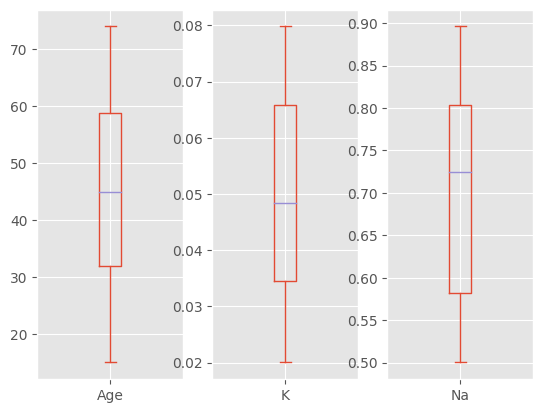

In [ ]:
numericDF.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(1,3))
plt.show()

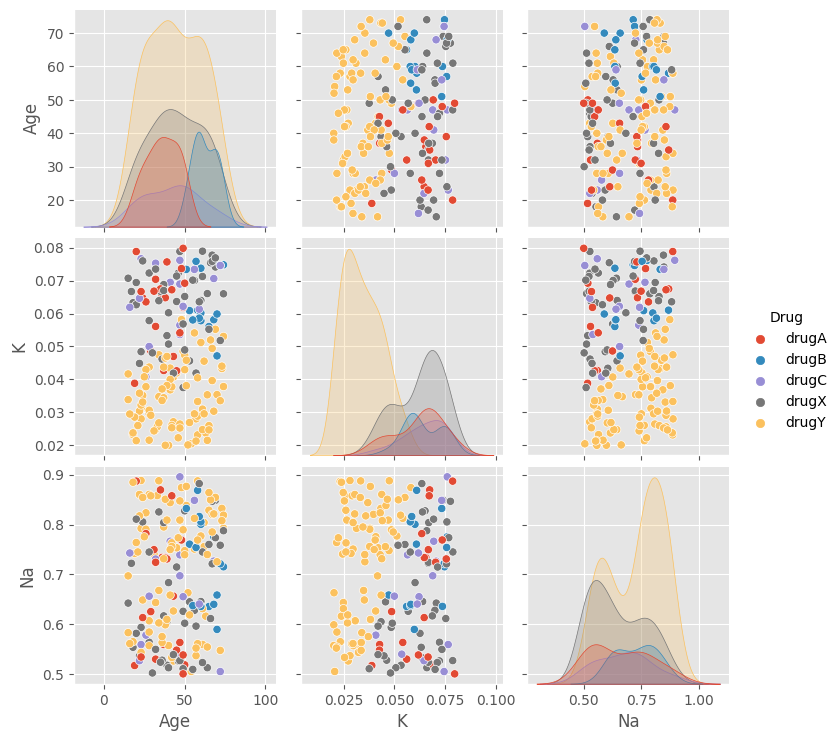

In [ ]:
sb.pairplot(numericDF, hue = 'Drug')
plt.show()

<ipython-input-258-1aa73e55f71b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df[df.columns.difference(['ID'])].corr(), annot=True, cmap='magma', fmt='.2f')


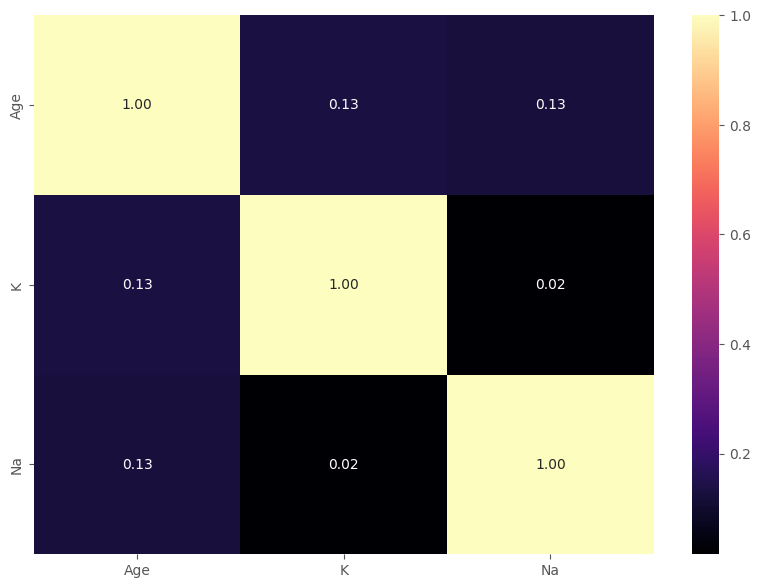

In [ ]:
plt.figure(figsize=(10,7))
sb.heatmap(df[df.columns.difference(['ID'])].corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

##**Data Preparation**

Remove all the attributes with too high or two low variability and all redundant attributes. In our case we have ID that is useless for our purposes due to the fact that it is too variable. Hence it's not discriminating.

In [ ]:
df = df[df.columns.difference(['ID'])]
df.head()

,Age,BP,Cholesterol,Drug,K,Na,Sex
0,23,HIGH,HIGH,drugY,0.031258,0.792535,F
1,47,LOW,HIGH,drugC,0.056468,0.739309,M
2,47,LOW,HIGH,drugC,0.068944,0.697269,M
3,28,NORMAL,HIGH,drugX,0.072289,0.563682,F
4,61,LOW,HIGH,drugY,0.030998,0.559294,F


### *Discretization*
TODO

###*Binarization*

######Every categorical attributes is binarized based on the values it can assume

In [ ]:
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('Drug')
df2 = pd.get_dummies(df, columns = cat_attributes)
new_attr_list = list(df2.columns)
new_attr_list.remove('Drug')
df2 = df2[new_attr_list]
df2.head()

,Age,K,Na,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
0,23,0.031258,0.792535,1,0,0,1,0,1,0
1,47,0.056468,0.739309,0,1,0,1,0,0,1
2,47,0.068944,0.697269,0,1,0,1,0,0,1
3,28,0.072289,0.563682,0,0,1,1,0,1,0
4,61,0.030998,0.559294,0,1,0,1,0,1,0


In [ ]:
df['Drug'].replace({'drugA':0,'drugB':1, 'drugC':2, 'drugX':3, 'drugY':4, },inplace=True)

<ipython-input-261-964201a82596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug'].replace({'drugA':0,'drugB':1, 'drugC':2, 'drugX':3, 'drugY':4, },inplace=True)


##**Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
x = np.array(df2.values)
y = np.array(df['Drug'].values)

seed = 200
test_size = .3
val_size = .2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

#####**Create the models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

In [ ]:
models = []
models.append(('Entropy_Decision_Tree', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('Gini_Decision_Tree', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))

# evaluate each model in turn

for name, model in models:
    print(name)
    
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    
    print('Classification metrics: ')
    print(classification_report(y_val, y_val_pred))

Entropy_Decision_Tree
Classification metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         7
           4       1.00      0.86      0.92        14

    accuracy                           0.93        27
   macro avg       0.90      0.97      0.92        27
weighted avg       0.96      0.93      0.94        27

Gini_Decision_Tree
Classification metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         7
           4       1.00      0.86      0.92        14

    accuracy                           0.93        27
   macro avg       0.90      0.97      0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#**Evaluation**

#####**Do prediction on test set**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=seed)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.91


In [ ]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

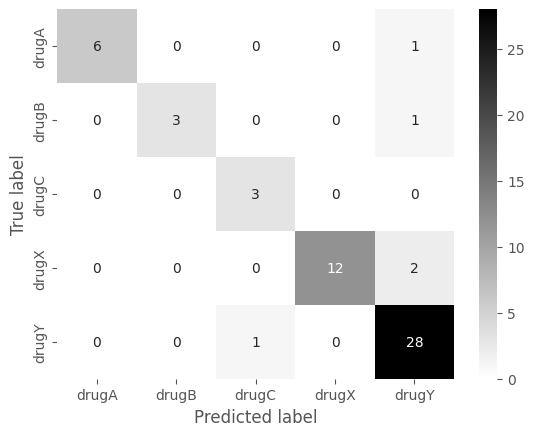

In [ ]:
categories = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

In [ ]:
print('Classification report')
print(classification_report(y_test, predictions))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.75      0.86         4
           2       0.75      1.00      0.86         3
           3       1.00      0.86      0.92        14
           4       0.88      0.97      0.92        29

    accuracy                           0.91        57
   macro avg       0.93      0.89      0.90        57
weighted avg       0.92      0.91      0.91        57



#####**Compute the Roc Curve for each class**


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['Drug']))

probs = []

for _, model in models:
    model.fit(x_train, y_train)
    probs.append(model.predict_proba(x_test))

Iteration 1, loss = 7.78000709
Iteration 2, loss = 6.82840307
Iteration 3, loss = 5.90961878
Iteration 4, loss = 5.04624774
Iteration 5, loss = 4.28765509
Iteration 6, loss = 3.72937090
Iteration 7, loss = 3.45870629
Iteration 8, loss = 3.40051541
Iteration 9, loss = 3.39443790
Iteration 10, loss = 3.39209764
Iteration 11, loss = 3.37826356
Iteration 12, loss = 3.34861325
Iteration 13, loss = 3.30337530
Iteration 14, loss = 3.24418844
Iteration 15, loss = 3.17318019
Iteration 16, loss = 3.09271402
Iteration 17, loss = 3.00514856
Iteration 18, loss = 2.91279641
Iteration 19, loss = 2.81798078
Iteration 20, loss = 2.72298247
Iteration 21, loss = 2.62987427
Iteration 22, loss = 2.54064821
Iteration 23, loss = 2.45706765
Iteration 24, loss = 2.38053039
Iteration 25, loss = 2.31195604
Iteration 26, loss = 2.25174733
Iteration 27, loss = 2.19960817
Iteration 28, loss = 2.15474175
Iteration 29, loss = 2.11571784
Iteration 30, loss = 2.08041828
Iteration 31, loss = 2.04790380
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


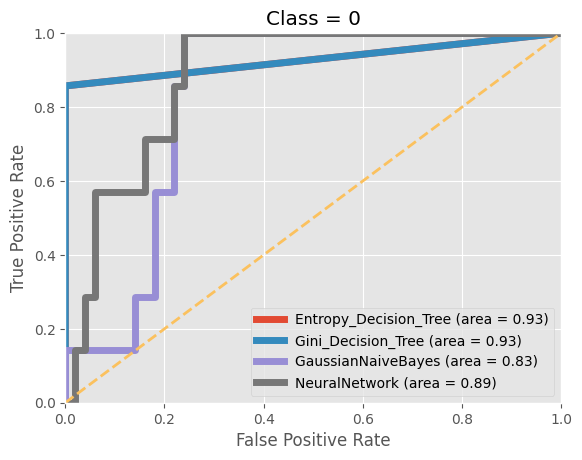

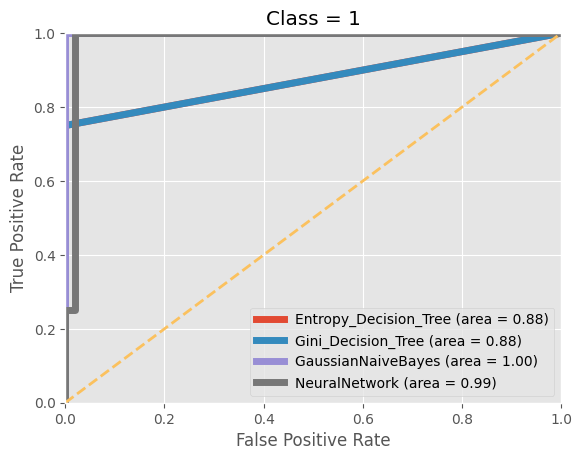

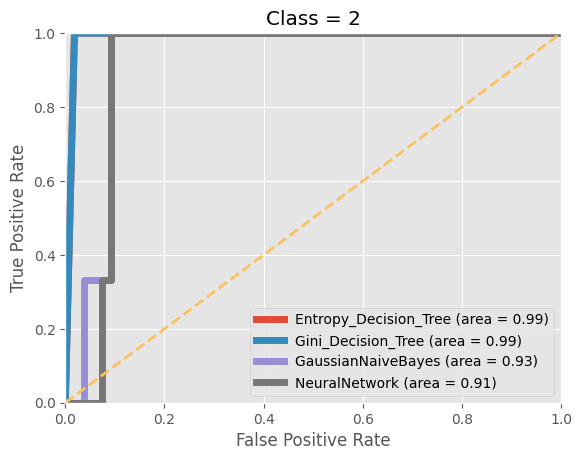

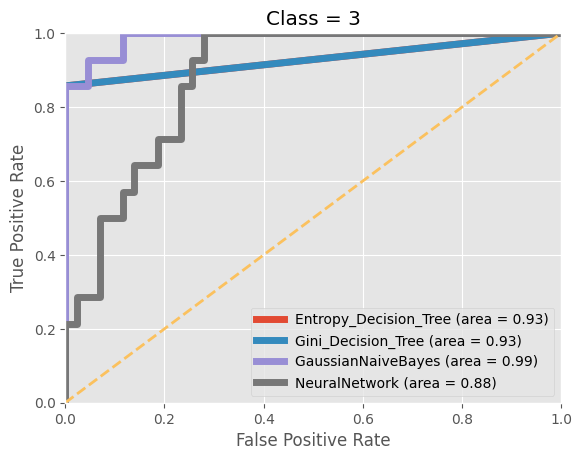

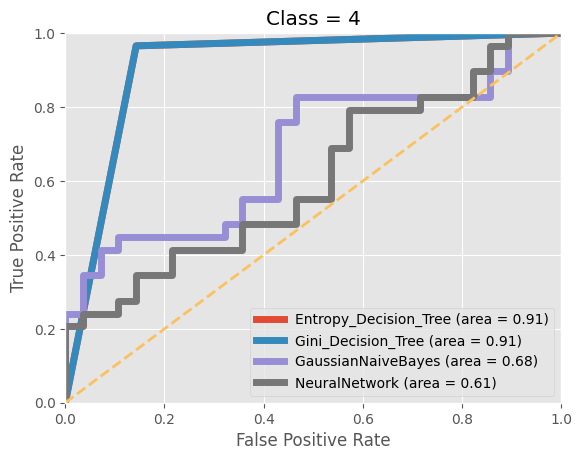

In [ ]:
fpr = dict() #False positive rate
tpr = dict() #True positive rate
roc_auc = dict() 

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1.]


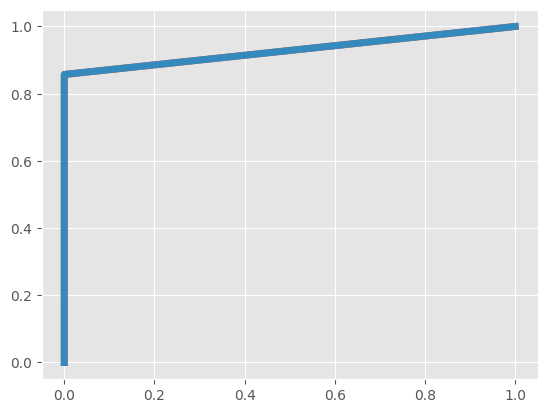

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        print(one_hot_encoding[:, i])
        print(probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1
        
        if m==2:
            break
    break

In [ ]:
roc_curve(one_hot_encoding[:, 0], probs[m][:, 0])

(array([0.  , 0.  , 0.14, 0.14, 0.18, 0.18, 0.22, 0.22, 0.24, 0.24, 0.32,
        1.  ]),
 array([0.        , 0.14285714, 0.14285714, 0.28571429, 0.28571429,
        0.57142857, 0.57142857, 0.85714286, 0.85714286, 1.        ,
        1.        , 1.        ]),
 array([2.00000000e+00, 9.99999998e-01, 9.99999701e-01, 9.99998175e-01,
        9.99979087e-01, 9.90886497e-01, 8.72216611e-01, 5.30801403e-01,
        4.60573802e-01, 2.49555292e-01, 1.41997126e-05, 0.00000000e+00]))

### **Drug Dataset**

### **Business Understanding**

- Scenario
    - A medical division collected some data from its patients
    - All the target patients contracted the same disease
    - The therapy consists of 5 different and exclusive cures
        - Each cure depends on the patients’ conditions
- Goal
    - Define an automatic procedure for the cure assignment 

### **Data Understanding**

| Column Name                   	| Description                                                                                                     	| Type                      	|
|-------------------	|------------------------------------------------	|-----------------      	|
| ID               	| Patient’s ID                    	|  Numeric                      	|
| Age               	| Patient’s age                 	|  Numeric             	|    
| Sex                	| Patient’s gender: F or M      	|  Binary                      	|
|      BP        	|        Blood Pressure: HIGH, NORMAL or LOW       	|   Categorical                       	|
|       Cholesterol         	|   Concentration of cholesterol in the blood: NORMAL or HIGH          	|   Binary    	|
|     Na           	|    Concentration of sodium in the blood       |     Numeric                    | 
|     K          	|   Concentration of potassium in the blood        	|   Numeric                       	|
|     Drug          	|      The chosen cure: drugY, drugC, drugX, drugA, drugB            	|      Categorical                    	|

### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
plt.style.use('ggplot')

### Read data

In [2]:
df = pd.read_csv('drug.csv',na_values = "?")

### Data Understanding

###### Data dimension (n_rows x n_columns)

In [3]:
df.shape

(200, 8)

##### How many elements?

In [4]:
df.size

1600

#### Attributes

In [5]:
print(df.columns.tolist())

['ID', 'Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug']


#### Top 10 records

In [6]:
df.head(10)

,ID,Age,Sex,BP,Cholesterol,Na,K,Drug
0,1,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,2,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,3,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,4,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,5,61,F,LOW,HIGH,0.559294,0.030998,drugY
5,6,22,F,NORMAL,HIGH,NaN,0.078647,drugX
6,7,49,F,NORMAL,HIGH,0.789637,0.048518,drugY
7,8,41,M,LOW,HIGH,0.766635,0.069461,drugC
8,9,60,M,NORMAL,HIGH,0.777205,0.051230,drugY
9,10,43,M,LOW,NORMAL,0.526102,0.027164,drugY


#### Get attribute type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           200 non-null    int64  
 1   Age          200 non-null    int64  
 2   Sex          200 non-null    object 
 3   BP           200 non-null    object 
 4   Cholesterol  200 non-null    object 
 5   Na           194 non-null    float64
 6   K            196 non-null    float64
 7   Drug         200 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 12.6+ KB


#### Convert wrong attribute types

- Sex
- BP
- Cholesterol
- Drug

In [8]:
for attribute in df.columns:
    if df[attribute].dtype == object:
        df[attribute] = df[attribute].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           200 non-null    int64   
 1   Age          200 non-null    int64   
 2   Sex          200 non-null    category
 3   BP           200 non-null    category
 4   Cholesterol  200 non-null    category
 5   Na           194 non-null    float64 
 6   K            196 non-null    float64 
 7   Drug         200 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 7.7 KB


#### Are there any null values?

In [10]:
df.isna().sum()

ID             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na             6
K              4
Drug           0
dtype: int64

#### Remove missing values

In [11]:
df.dropna(inplace=True)
df.isna().sum()

ID             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

#### Get general statistics

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,190.0,101.305263,57.269912,1.000000,52.250000,102.500000,150.750000,200.000000
Age,190.0,44.810526,16.598779,15.000000,32.000000,45.000000,58.750000,74.000000
Na,190.0,0.696236,0.120109,0.500169,0.581946,0.724398,0.803268,0.896056
K,190.0,0.049753,0.017682,0.020022,0.034528,0.048467,0.065877,0.079788


In [13]:
df.describe(include='category').T

,count,unique,top,freq
Sex,190,2,M,99
BP,190,3,HIGH,74
Cholesterol,190,2,HIGH,100
Drug,190,5,drugY,88


#### Building histograms

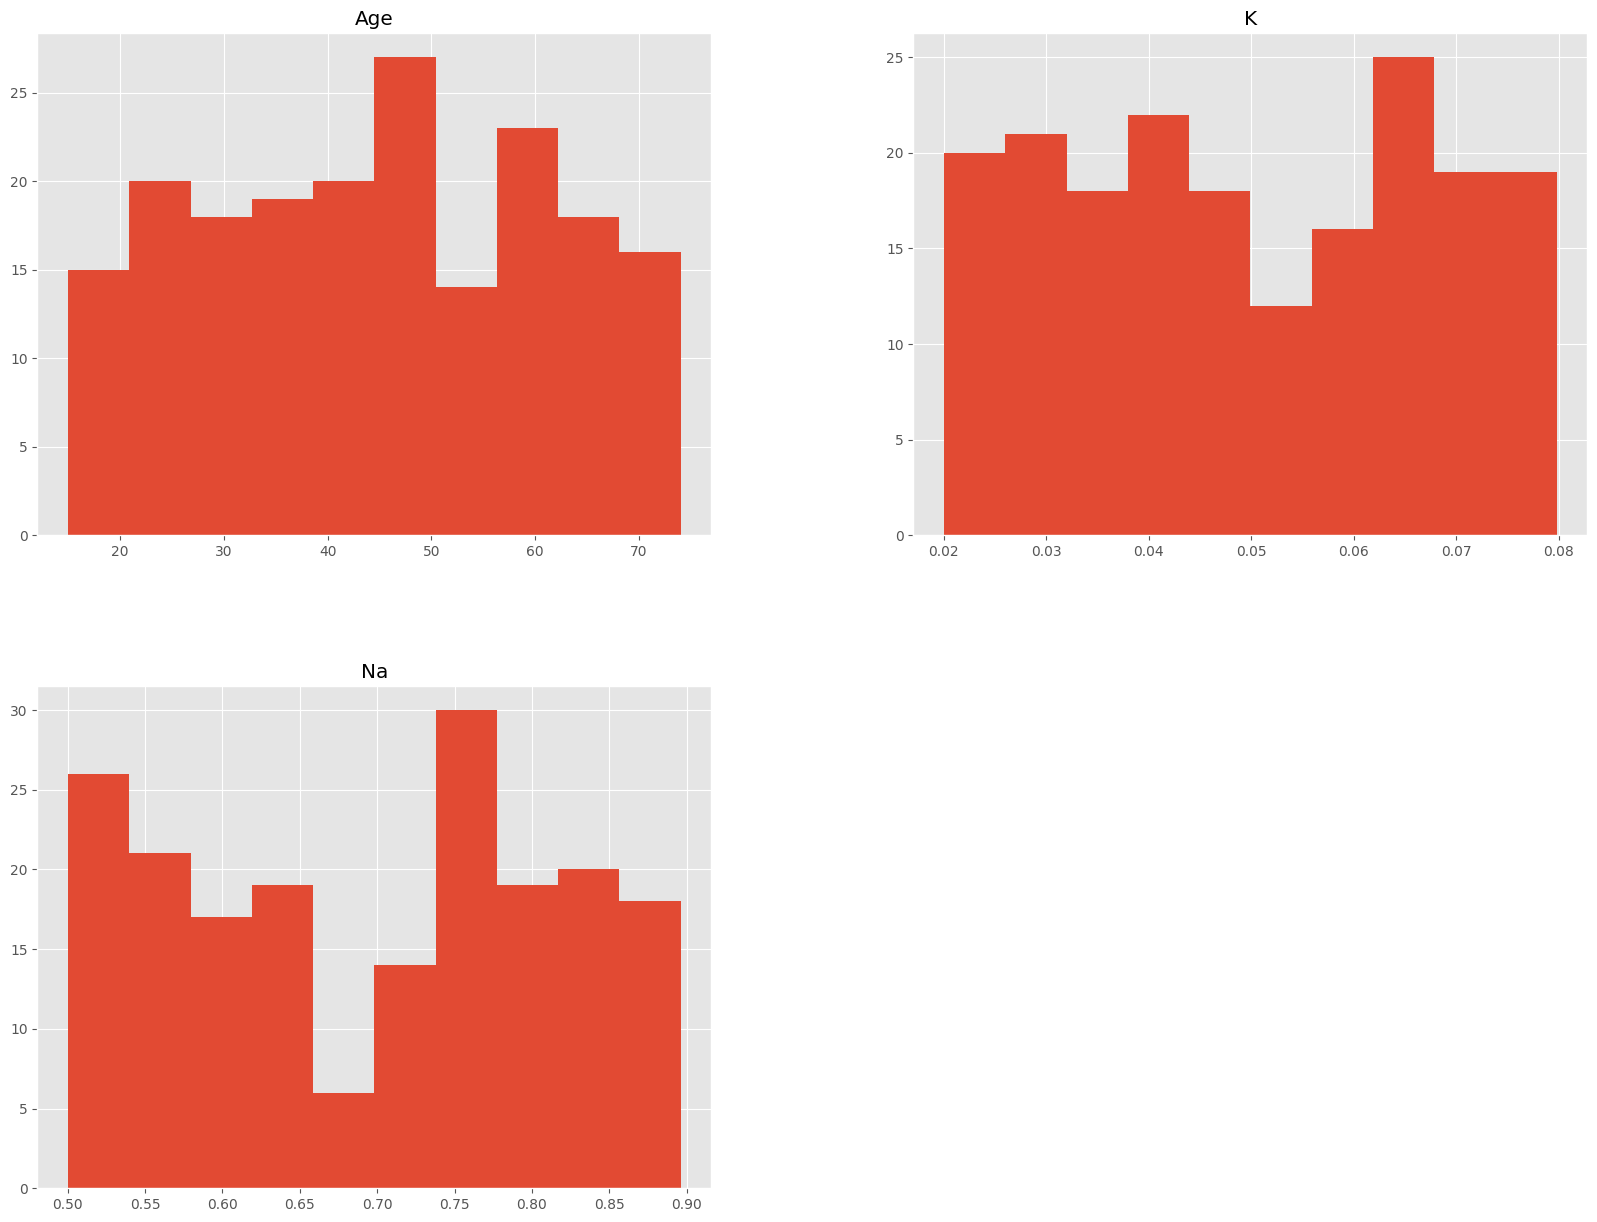

In [14]:
numeric_df = df[df.columns.difference(['Sex','BP','Cholesterol','ID','Drug'])]
numeric_df.hist(figsize = (20,15))
plt.show()

#### Bar plots for categorical attributes

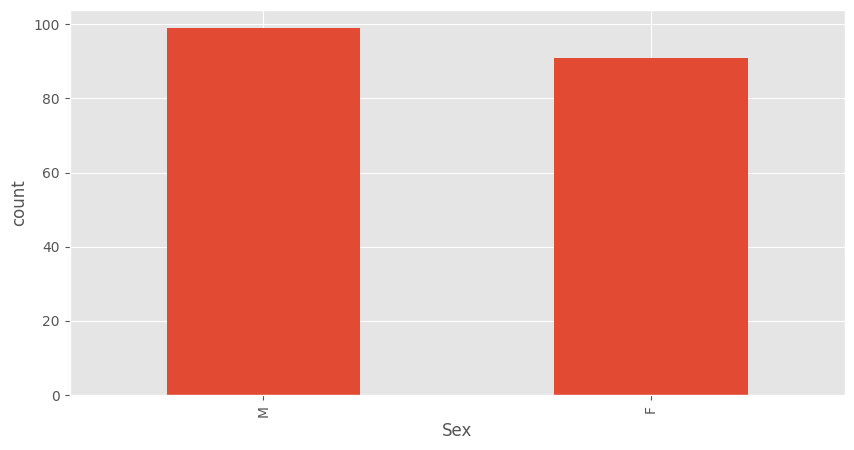

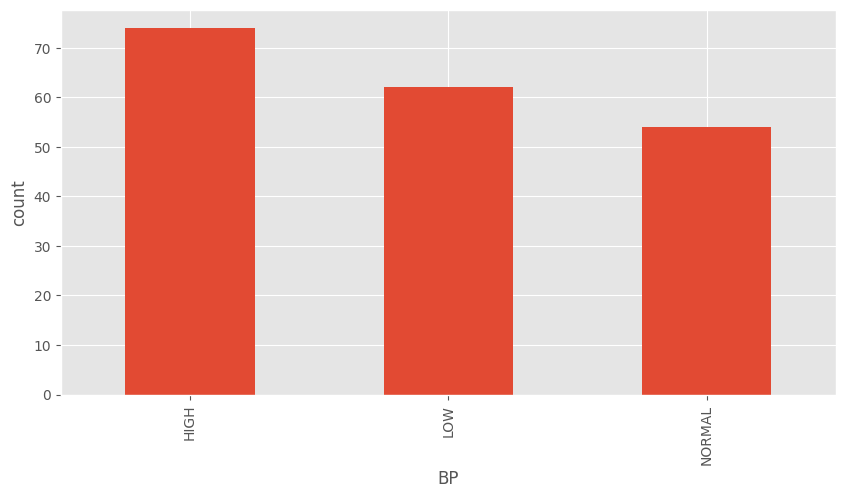

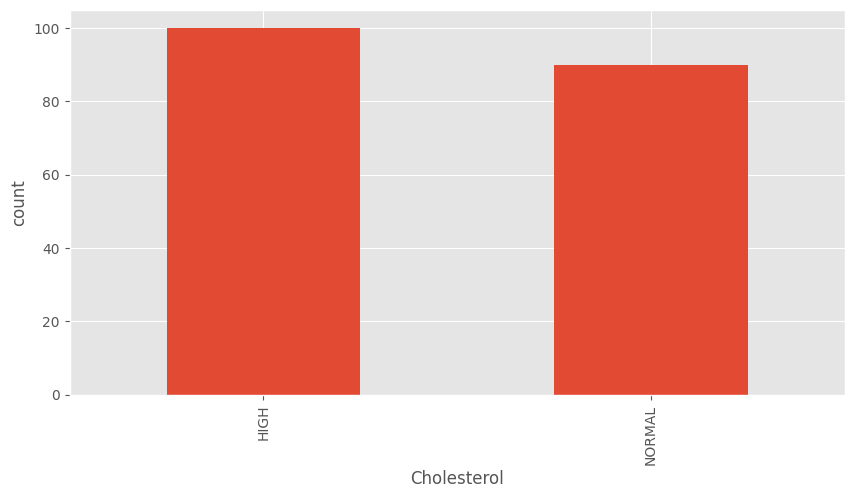

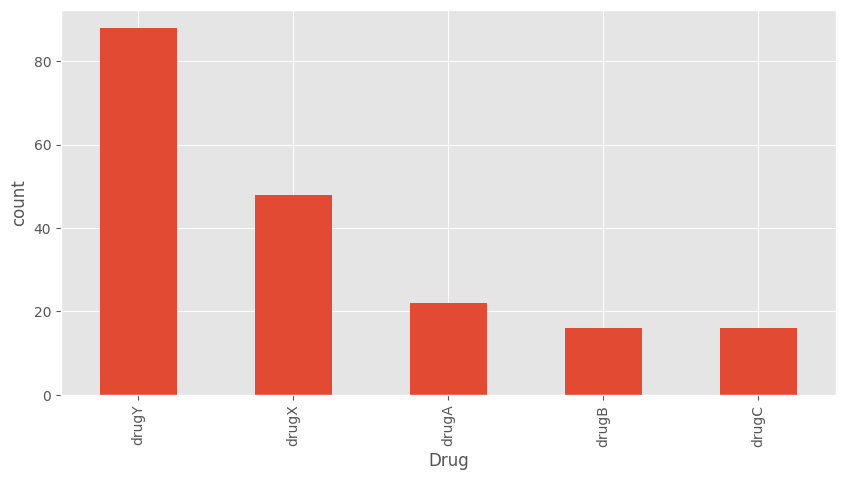

In [15]:
category_columns = [col for col in df.columns if df[col].dtype.name == 'category']
for attribute in category_columns:
    val = df[attribute].value_counts()
    val.plot(kind='bar',figsize=(10,5))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()